<a href="https://colab.research.google.com/github/priyadharshini2002/damaple/blob/main/ML_MAJOR_JULY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import sklearn as skl
df =pd.read_csv('/content/train.csv')
df


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [5]:
plt.ion()

In [6]:
from matplotlib.pyplot import figure 
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LassoCV,RidgeClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression

In [9]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [10]:
df.iloc[:,:20].columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [11]:
col = df.iloc[:,:20].columns
values = df.iloc[:,:20].values #returns a numpy array
scaler = MaxAbsScaler()
scaled_1 = scaler.fit_transform(values)
scaled = pd.DataFrame(scaled_1, columns=col)
scaled.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0.421421,0.0,0.733333,0.0,0.052632,0.0,0.109375,0.6,0.940,0.250,0.10,0.010204,0.378378,0.637569,0.473684,0.388889,0.95,0.0,0.0,1.0
1,0.511011,1.0,0.166667,1.0,0.000000,1.0,0.828125,0.7,0.680,0.375,0.30,0.461735,0.994995,0.658079,0.894737,0.166667,0.35,1.0,1.0,0.0
2,0.281782,1.0,0.166667,1.0,0.105263,1.0,0.640625,0.9,0.725,0.625,0.30,0.644388,0.858859,0.651076,0.578947,0.111111,0.45,1.0,1.0,0.0
3,0.307808,1.0,0.833333,0.0,0.000000,0.0,0.156250,0.8,0.655,0.750,0.45,0.620408,0.893894,0.692596,0.842105,0.444444,0.55,1.0,0.0,0.0
4,0.911411,1.0,0.400000,0.0,0.684211,1.0,0.687500,0.6,0.705,0.250,0.70,0.616327,0.606607,0.352926,0.421053,0.111111,0.75,1.0,1.0,0.0


In [14]:
scaled['price_range'] = df['price_range']

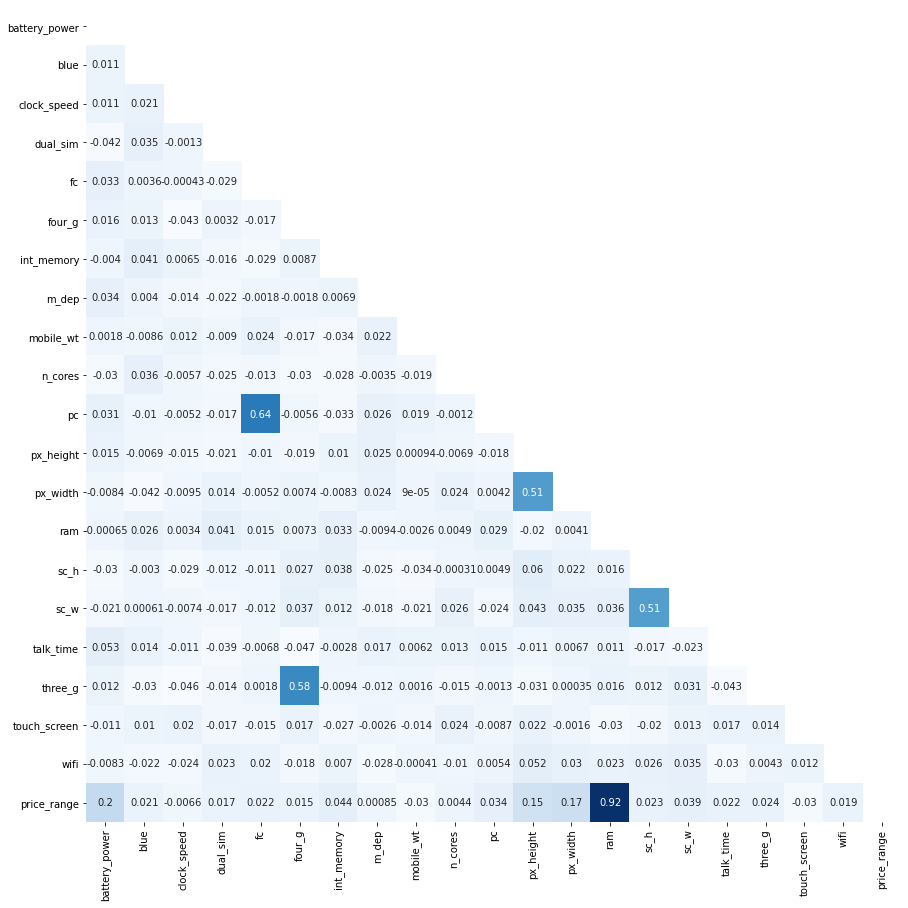

In [15]:
corr_matrix=scaled.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(25,15))
with sns.axes_style("white"):
    sns.heatmap(corr_matrix, mask=mask, square=True, annot=True, cmap=cm.Blues, cbar=False)


In [16]:
corr = scaled.corr()
corr = corr.price_range
corr.sort_values(ascending = False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

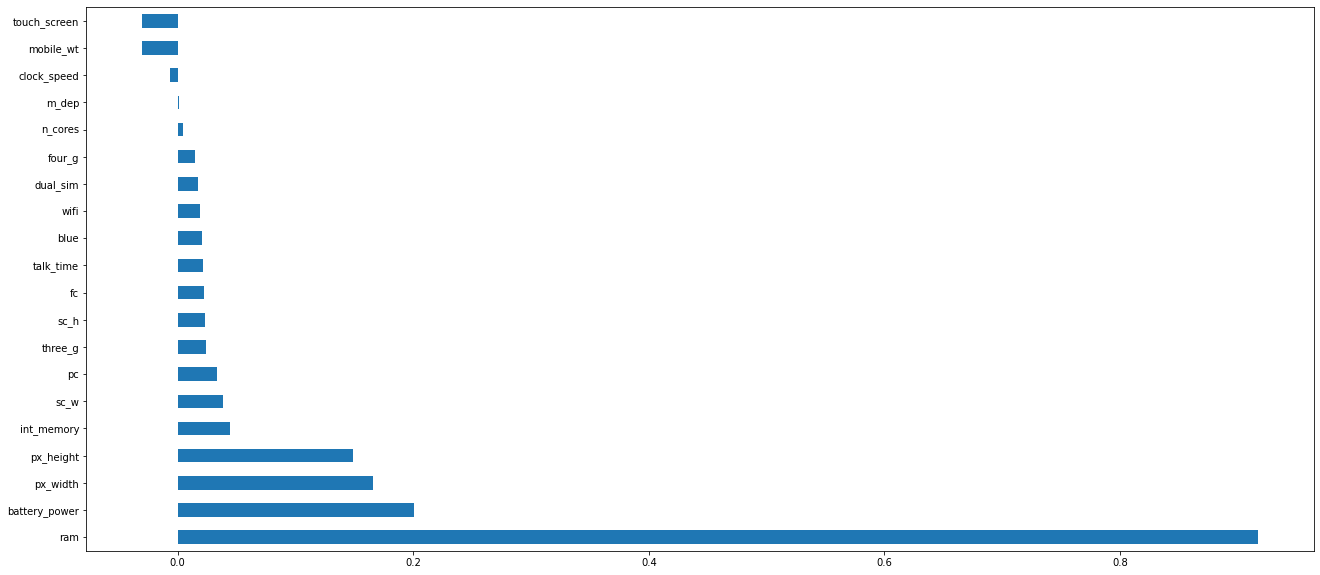

In [17]:
fig = figure(figsize=(22,10))
corr.sort_values(ascending = False)[1:].plot(kind='barh');

<Figure size 3600x2160 with 0 Axes>

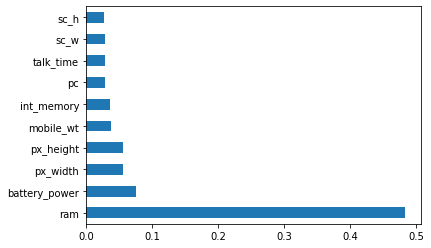

<Figure size 3600x2160 with 0 Axes>

In [18]:
X = scaled.drop(['price_range'],axis=1)
y = scaled['price_range']

model1 = RandomForestClassifier()
model1.fit(X , y)

feature_imp1 = pd.Series(model1.feature_importances_ , index = X.columns)
feature_imp1.nlargest(10).plot(kind = 'barh')
figure(num=None, figsize=(50, 30))

<Figure size 3600x2160 with 0 Axes>

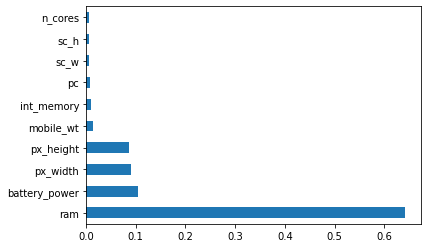

<Figure size 3600x2160 with 0 Axes>

In [19]:
model = DecisionTreeClassifier(criterion='gini')
model.fit(X , y)

feature_imp = pd.Series(model.feature_importances_ , index = X.columns)
feature_imp.nlargest(10).plot(kind = 'barh')
figure(num=None, figsize=(50, 30))

In [20]:
best_features = SelectKBest(score_func = chi2 , k = 10)
fit = best_features.fit(X , y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)
f_score = pd.concat([df_scores , df_columns], axis = 1)
f_score.columns = ['score' , 'features']
print (f_score.nlargest(20 , 'score'))

         score       features
13  232.933346            ram
11    8.858964      px_height
0     7.072005  battery_power
12    4.910204       px_width
18    1.928429   touch_screen
5     1.521572         four_g
6     1.403736     int_memory
9     1.137194        n_cores
15    0.915573           sc_w
7     0.745820          m_dep
1     0.723232           blue
16    0.661820      talk_time
3     0.631011       dual_sim
4     0.533430             fc
14    0.506046           sc_h
8     0.479864      mobile_wt
10    0.459303             pc
19    0.422091           wifi
17    0.327643        three_g
2     0.216122    clock_speed


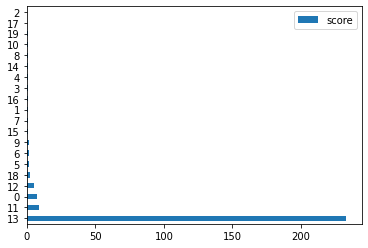

In [21]:
f_score.nlargest(20 , 'score').plot(kind='barh');

In [22]:
scaled_copy = scaled.copy()


scaled_copy['categorical'] = (scaled_copy["blue"].astype(bool) + \
                    scaled_copy["dual_sim"].astype(bool) + \
                    scaled_copy["four_g"].astype(bool) + \
                    scaled_copy["three_g"].astype(bool) + \
                    scaled_copy["touch_screen"].astype(bool) + \
                    scaled_copy["wifi"].astype(bool))

scaled_copy = scaled_copy[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'categorical','price_range' ]]
scaled_copy.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/computation/expressions.py:204: UserWarning:

evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead



,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,categorical,price_range
0,0.421421,0.0,0.733333,0.0,0.052632,0.0,0.109375,0.6,0.940,0.250,0.10,0.010204,0.378378,0.637569,0.473684,0.388889,0.95,0.0,0.0,1.0,True,1
1,0.511011,1.0,0.166667,1.0,0.000000,1.0,0.828125,0.7,0.680,0.375,0.30,0.461735,0.994995,0.658079,0.894737,0.166667,0.35,1.0,1.0,0.0,True,2
2,0.281782,1.0,0.166667,1.0,0.105263,1.0,0.640625,0.9,0.725,0.625,0.30,0.644388,0.858859,0.651076,0.578947,0.111111,0.45,1.0,1.0,0.0,True,2
3,0.307808,1.0,0.833333,0.0,0.000000,0.0,0.156250,0.8,0.655,0.750,0.45,0.620408,0.893894,0.692596,0.842105,0.444444,0.55,1.0,0.0,0.0,True,2
4,0.911411,1.0,0.400000,0.0,0.684211,1.0,0.687500,0.6,0.705,0.250,0.70,0.616327,0.606607,0.352926,0.421053,0.111111,0.75,1.0,1.0,0.0,True,1


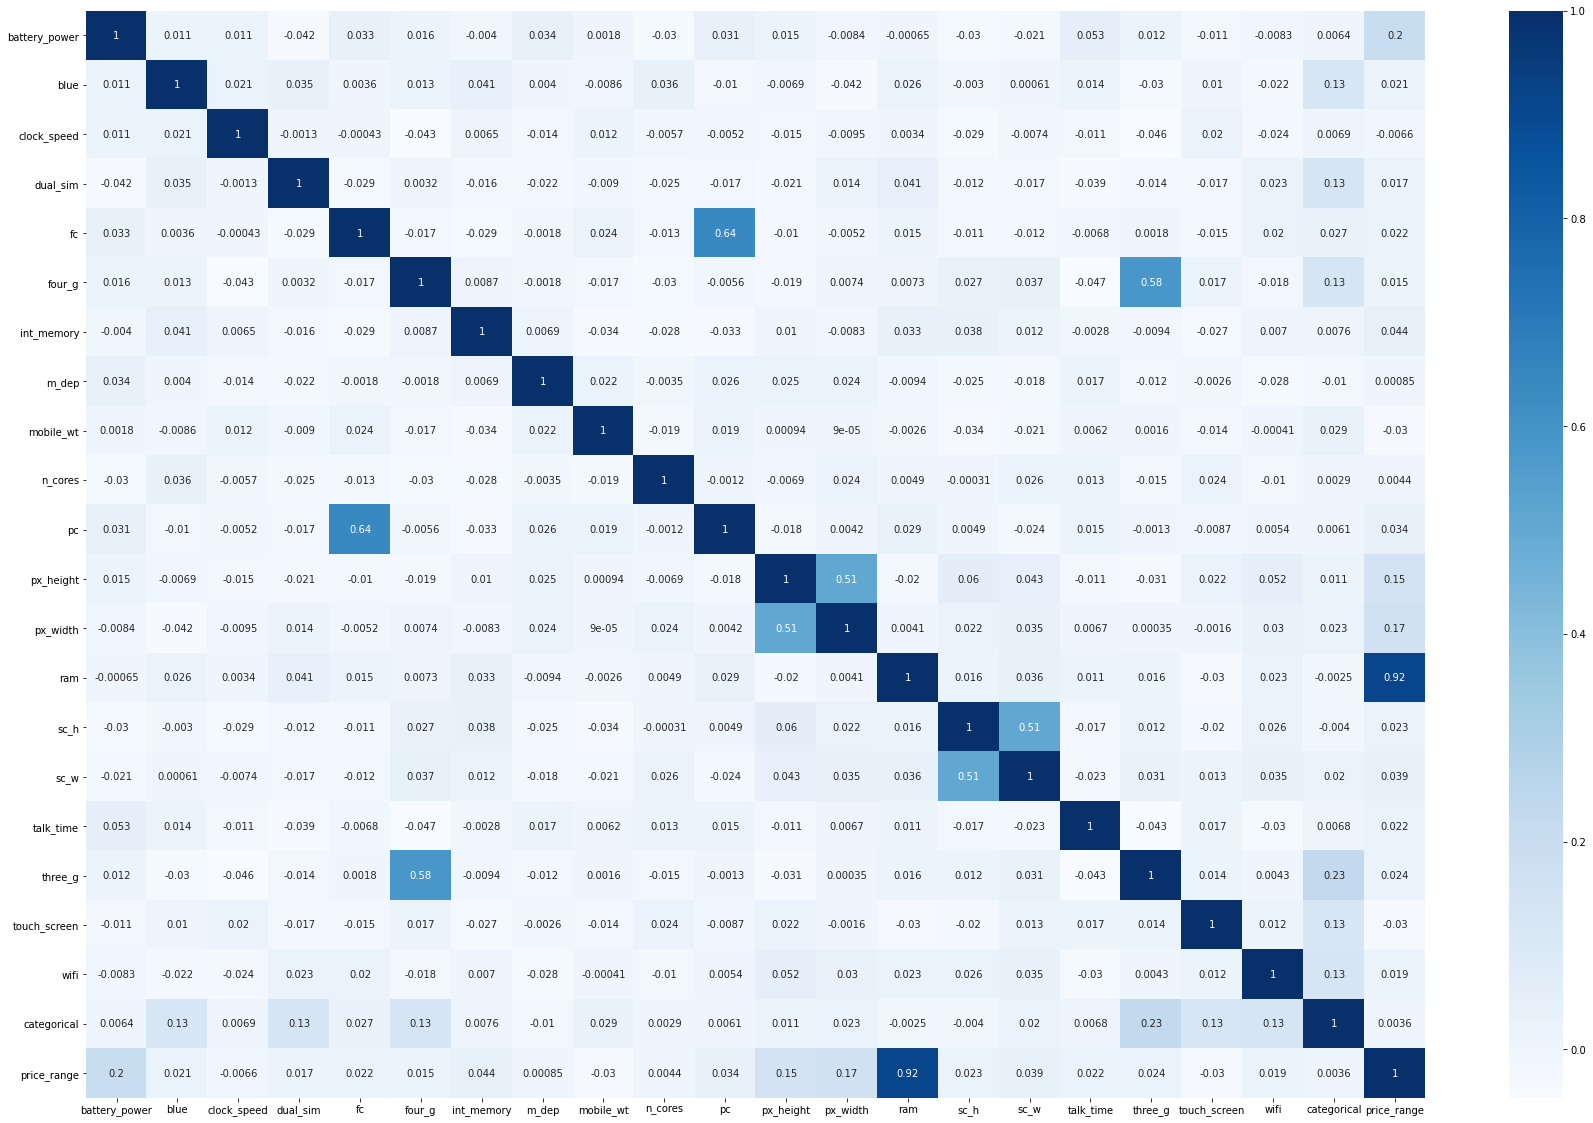

In [23]:
plt.figure(figsize=(30,20))
sns.heatmap(scaled_copy.corr(),annot=True,cmap=cm.Blues);

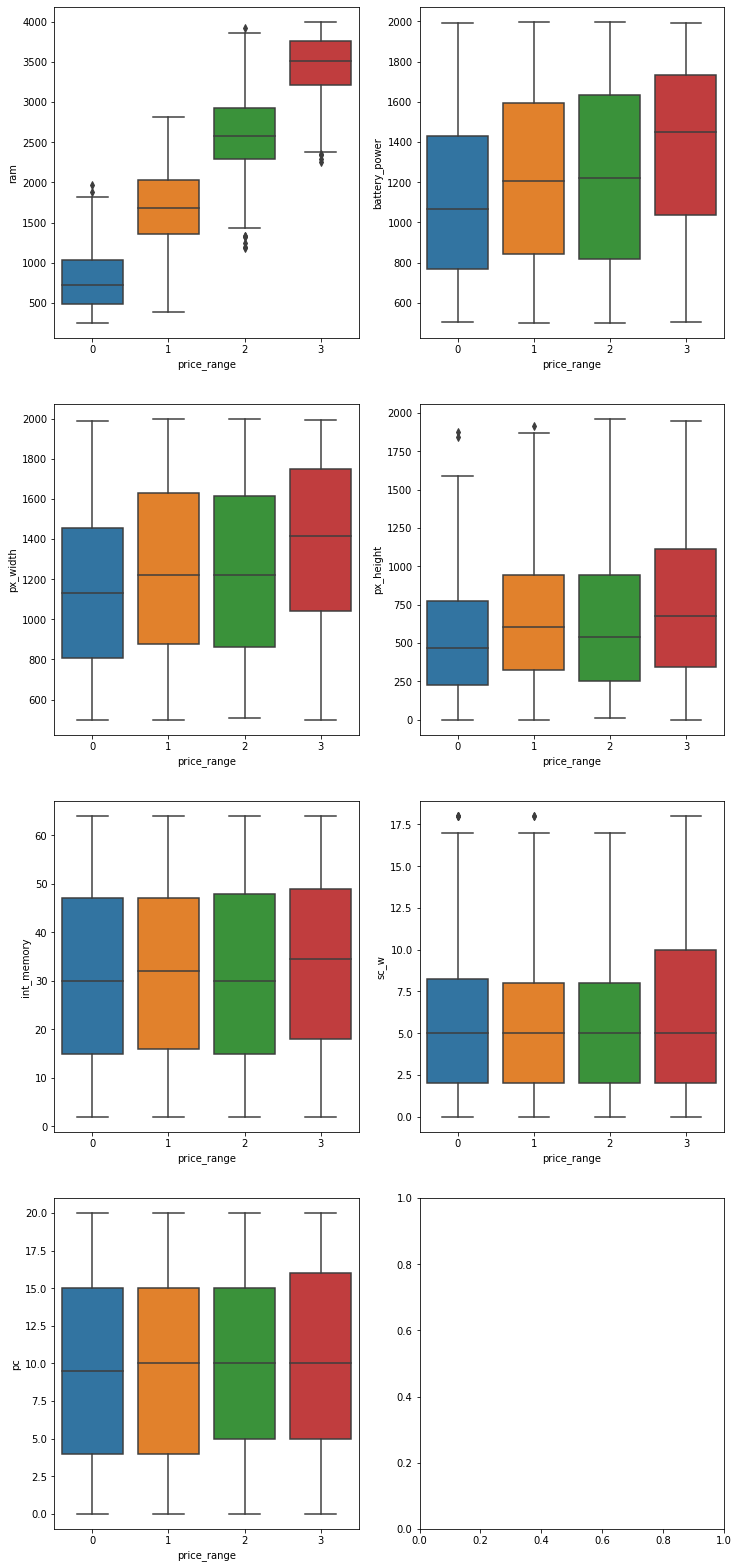

In [27]:
fig, ax = plt.subplots(ncols=2, nrows=4, figsize=(12,28))
sns.boxplot(x='price_range',y='ram',data=df,ax=ax[0,0]);
sns.boxplot(x='price_range',y='battery_power',data=df,ax=ax[0,1]);
sns.boxplot(x='price_range',y='px_width',data=df,ax=ax[1,0]);
sns.boxplot(x='price_range',y='px_height',data=df,ax=ax[1,1]);
sns.boxplot(x='price_range',y='int_memory',data=df,ax=ax[2,0]);
sns.boxplot(x='price_range',y='sc_w',data=df,ax=ax[2,1]);
sns.boxplot(x='price_range',y='pc',data=df,ax=ax[3,0]);

In [36]:
m_price_copy = df.copy()
pd.cut(m_price_copy.ram,5).unique()

[(2501.2, 3249.6], (1004.4, 1752.8], (252.258, 1004.4], (3249.6, 3998.0], (1752.8, 2501.2]]
Categories (5, interval[float64]): [(252.258, 1004.4] < (1004.4, 1752.8] < (1752.8, 2501.2] <
                                    (2501.2, 3249.6] < (3249.6, 3998.0]]

In [37]:
pd.cut(m_price_copy.px_height,5).unique()
pd.cut(m_price_copy.battery_power,5).unique()
pd.cut(m_price_copy.px_width,5).unique()
pd.cut(m_price_copy.int_memory,5).unique()
pd.cut(m_price_copy.sc_w,5).unique()
pd.cut(m_price_copy.pc,5).unique()
#ram
m_price_copy.loc[m_price_copy['ram'] <= 1004.4, 'ram'] = 0
m_price_copy.loc[(m_price_copy['ram'] > 1004.4) & (m_price_copy['ram'] <= 1752.8), 'ram'] = 1
m_price_copy.loc[(m_price_copy['ram'] > 1752.8) & (m_price_copy['ram'] <= 2501.2), 'ram'] = 2
m_price_copy.loc[(m_price_copy['ram'] > 2501.2) & (m_price_copy['ram'] <= 3249.6), 'ram'] = 3
m_price_copy.loc[m_price_copy['ram'] > 3249.6 , 'ram'] = 4

#pixel_height
m_price_copy.loc[m_price_copy['px_height'] <= 392.0, 'px_height'] = 0
m_price_copy.loc[(m_price_copy['px_height'] > 392.0) & (m_price_copy['px_height'] <= 784.0), 'px_height'] = 1
m_price_copy.loc[(m_price_copy['px_height'] > 784.0) & (m_price_copy['px_height'] <= 1176.0), 'px_height']   = 2
m_price_copy.loc[(m_price_copy['px_height'] > 1176.0) & (m_price_copy['px_height'] <= 1568.0), 'px_height'] = 3
m_price_copy.loc[m_price_copy['px_height'] > 1568.0 , 'px_height'] = 4

#battery_power
m_price_copy.loc[m_price_copy['battery_power'] <= 800.4, 'battery_power'] = 0
m_price_copy.loc[(m_price_copy['battery_power'] > 800.4) & (m_price_copy['battery_power'] <= 1099.8), 'battery_power'] = 1
m_price_copy.loc[(m_price_copy['battery_power'] > 1099.8) & (m_price_copy['battery_power'] <= 1399.2), 'battery_power']   = 2
m_price_copy.loc[(m_price_copy['battery_power'] > 1399.2) & (m_price_copy['battery_power'] <= 1698.6), 'battery_power'] = 3
m_price_copy.loc[m_price_copy['battery_power'] > 1698.6 , 'battery_power'] = 4

#pixel_width
m_price_copy.loc[m_price_copy['px_width'] <= 799.6, 'px_width'] = 0
m_price_copy.loc[(m_price_copy['px_width'] > 799.6) & (m_price_copy['px_width'] <= 1099.2), 'px_width'] = 1
m_price_copy.loc[(m_price_copy['px_width'] > 1099.2) & (m_price_copy['px_width'] <= 1398.8), 'px_width']   = 2
m_price_copy.loc[(m_price_copy['px_width'] > 1398.8) & (m_price_copy['px_width'] <= 1698.4), 'px_width'] = 3
m_price_copy.loc[m_price_copy['px_width'] > 1698.4 , 'px_width'] = 4

#internal_memory
m_price_copy.loc[m_price_copy['int_memory'] <= 14.4, 'int_memory'] = 0
m_price_copy.loc[(m_price_copy['int_memory'] > 14.4) & (m_price_copy['int_memory'] <= 26.8), 'int_memory'] = 1
m_price_copy.loc[(m_price_copy['int_memory'] > 26.8) & (m_price_copy['int_memory'] <= 39.2), 'int_memory']   = 2
m_price_copy.loc[(m_price_copy['int_memory'] > 39.2) & (m_price_copy['int_memory'] <= 51.6), 'int_memory'] = 3
m_price_copy.loc[m_price_copy['int_memory'] > 51.6 , 'int_memory'] = 4

#screen_width
m_price_copy.loc[m_price_copy['sc_w'] <= 3.6, 'sc_w'] = 0
m_price_copy.loc[(m_price_copy['sc_w'] > 3.6) & (m_price_copy['sc_w'] <= 7.2), 'sc_w'] = 1
m_price_copy.loc[(m_price_copy['sc_w'] > 7.2) & (m_price_copy['sc_w'] <= 10.8), 'sc_w']   = 2
m_price_copy.loc[(m_price_copy['sc_w'] > 10.8) & (m_price_copy['sc_w'] <= 14.4), 'sc_w'] = 3
m_price_copy.loc[m_price_copy['sc_w'] > 14.4 , 'sc_w'] = 4

#primary_camera
m_price_copy.loc[m_price_copy['pc'] <= 4.0, 'pc'] = 0
m_price_copy.loc[(m_price_copy['pc'] > 4.0) & (m_price_copy['pc'] <= 8.0), 'pc'] = 1
m_price_copy.loc[(m_price_copy['pc'] > 8.0) & (m_price_copy['pc'] <= 12.0), 'pc']   = 2
m_price_copy.loc[(m_price_copy['pc'] > 12.0) & (m_price_copy['pc'] <= 16.0), 'pc'] = 3
m_price_copy.loc[m_price_copy['pc'] > 16.0 , 'pc'] = 4



In [38]:
(m_price_copy[m_price_copy.price_range == 0].ram.value_counts() * 100)/(m_price_copy[m_price_copy.price_range == 0]).ram.count()

0    73.0
1    26.4
2     0.6
Name: ram, dtype: float64

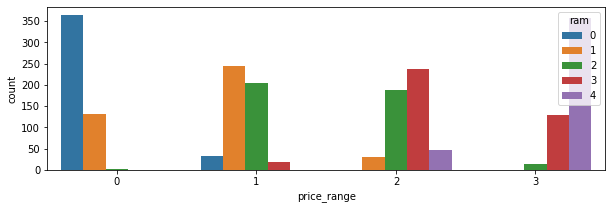

In [39]:
fig, ax = plt.subplots(figsize=(10,3))
sns.countplot(data=m_price_copy,x='price_range',hue='ram')

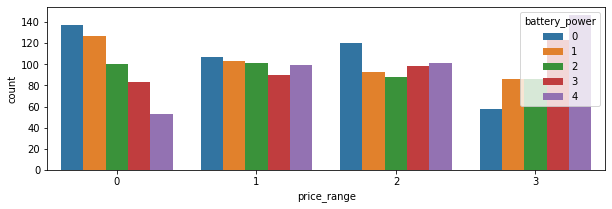

In [40]:
fig, ax = plt.subplots(figsize=(10,3))
sns.countplot(data=m_price_copy,x='price_range',hue='battery_power');

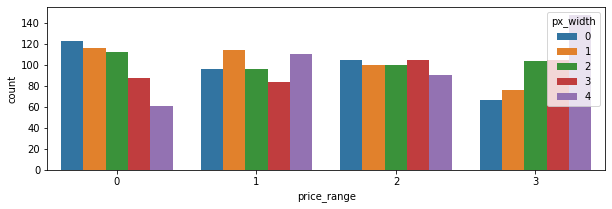

In [42]:
fig, ax = plt.subplots(figsize=(10,3))
sns.countplot(data=m_price_copy,x='price_range',hue='px_width');

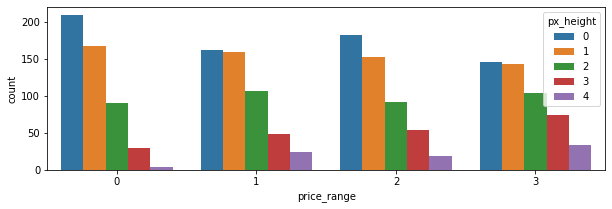

In [44]:
fig, ax = plt.subplots(figsize=(10,3))
sns.countplot(data=m_price_copy,x='price_range',hue='px_height');

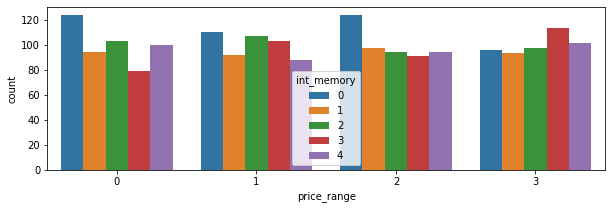

In [45]:
fig, ax = plt.subplots(figsize=(10,3))
sns.countplot(data=m_price_copy,x='price_range',hue='int_memory');

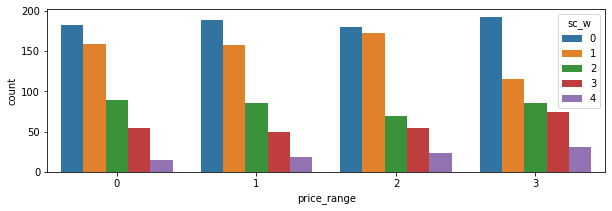

In [46]:
fig, ax = plt.subplots(figsize=(10,3))
sns.countplot(data=m_price_copy,x='price_range',hue='sc_w');

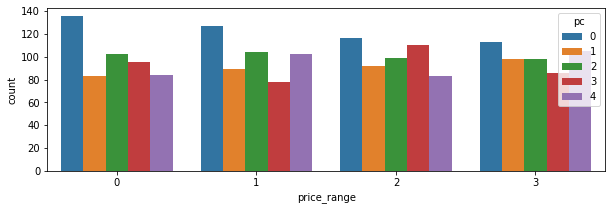

In [47]:
fig, ax = plt.subplots(figsize=(10,3))
sns.countplot(data=m_price_copy,x='price_range',hue='pc');

In [49]:
m_price_copy['ram_actual'] = df.ram
m_price_copy['battery_power_actual'] = df.battery_power
m_price_copy['px_width_actual'] = df.px_width
m_price_copy['px_height_actual'] = df.px_height
m_price_copy['int_memory_actual'] =df.int_memory
m_price_copy['sc_w_actual'] = df.sc_w
m_price_copy['pc_actual'] = df.pc

In [50]:
m_price_copy[['ram','ram_actual','price_range']].head()

,ram,ram_actual,price_range
0,3,2549,1
1,3,2631,2
2,3,2603,2
3,3,2769,2
4,1,1411,1


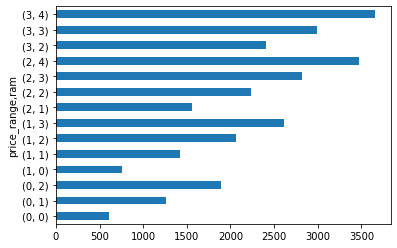

In [51]:
m_price_copy.groupby(['price_range','ram']).ram_actual.mean().plot(kind='barh');

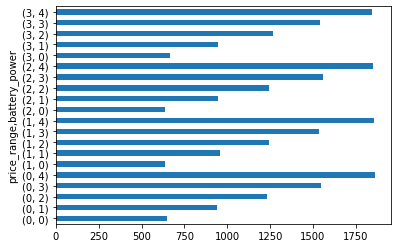

In [52]:
m_price_copy.groupby(['price_range','battery_power']).battery_power_actual.mean().plot(kind='barh');

In [53]:
scaled.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0.421421,0.0,0.733333,0.0,0.052632,0.0,0.109375,0.6,0.940,0.250,0.10,0.010204,0.378378,0.637569,0.473684,0.388889,0.95,0.0,0.0,1.0,1
1,0.511011,1.0,0.166667,1.0,0.000000,1.0,0.828125,0.7,0.680,0.375,0.30,0.461735,0.994995,0.658079,0.894737,0.166667,0.35,1.0,1.0,0.0,2
2,0.281782,1.0,0.166667,1.0,0.105263,1.0,0.640625,0.9,0.725,0.625,0.30,0.644388,0.858859,0.651076,0.578947,0.111111,0.45,1.0,1.0,0.0,2
3,0.307808,1.0,0.833333,0.0,0.000000,0.0,0.156250,0.8,0.655,0.750,0.45,0.620408,0.893894,0.692596,0.842105,0.444444,0.55,1.0,0.0,0.0,2
4,0.911411,1.0,0.400000,0.0,0.684211,1.0,0.687500,0.6,0.705,0.250,0.70,0.616327,0.606607,0.352926,0.421053,0.111111,0.75,1.0,1.0,0.0,1


In [54]:
scaled_copy.dtypes

battery_power    float64
blue             float64
clock_speed      float64
dual_sim         float64
fc               float64
four_g           float64
int_memory       float64
m_dep            float64
mobile_wt        float64
n_cores          float64
pc               float64
px_height        float64
px_width         float64
ram              float64
sc_h             float64
sc_w             float64
talk_time        float64
three_g          float64
touch_screen     float64
wifi             float64
categorical         bool
price_range        int64
dtype: object

In [55]:
scaled_copy.categorical = scaled_copy.categorical.astype(bool)

In [56]:
scaled_copy.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,categorical,price_range
0,0.421421,0.0,0.733333,0.0,0.052632,0.0,0.109375,0.6,0.940,0.250,0.10,0.010204,0.378378,0.637569,0.473684,0.388889,0.95,0.0,0.0,1.0,True,1
1,0.511011,1.0,0.166667,1.0,0.000000,1.0,0.828125,0.7,0.680,0.375,0.30,0.461735,0.994995,0.658079,0.894737,0.166667,0.35,1.0,1.0,0.0,True,2
2,0.281782,1.0,0.166667,1.0,0.105263,1.0,0.640625,0.9,0.725,0.625,0.30,0.644388,0.858859,0.651076,0.578947,0.111111,0.45,1.0,1.0,0.0,True,2
3,0.307808,1.0,0.833333,0.0,0.000000,0.0,0.156250,0.8,0.655,0.750,0.45,0.620408,0.893894,0.692596,0.842105,0.444444,0.55,1.0,0.0,0.0,True,2
4,0.911411,1.0,0.400000,0.0,0.684211,1.0,0.687500,0.6,0.705,0.250,0.70,0.616327,0.606607,0.352926,0.421053,0.111111,0.75,1.0,1.0,0.0,True,1


In [57]:
scaled_copy.categorical.unique()

array([ True, False])

In [58]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X1=ss.fit_transform(X=X)

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X1,y,test_size=0.3)
model = LogisticRegression()
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))

Train Set Accuracy:97.85714285714285
Test Set Accuracy:96.66666666666667


In [60]:
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
#SVC classifier
model = SVC()
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))

Train Set Accuracy:98.35714285714286
Test Set Accuracy:85.83333333333333

Confusion Matrix:
[[145  10   0   0]
 [ 11 133  10   0]
 [  0  22 116  18]
 [  0   0  14 121]]


In [61]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))


Train Set Accuracy:100.0
Test Set Accuracy:85.33333333333334

Confusion Matrix:
[[142  15   0   0]
 [ 14 131  10   0]
 [  0  19 116  16]
 [  0   0  14 123]]


In [62]:
scaled.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [63]:
X_new = scaled[['ram','battery_power','px_width','px_height','int_memory','sc_w','pc']].values#,'touch_screen','mobile_wt']].values
y_new = scaled['price_range'].values
X1=ss.fit_transform(X=X_new)
X_train,X_test,y_train,y_test = train_test_split(X1,y,test_size=0.3)

In [64]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))

Train Set Accuracy:95.71428571428572
Test Set Accuracy:94.66666666666667


In [65]:
model = SVC()
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

from sklearn.metrics import classification_report

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))
print(classification_report(y_test,y_test_pred))

Train Set Accuracy:95.78571428571429
Test Set Accuracy:91.16666666666666

Confusion Matrix:
[[148   6   0   0]
 [  4 139  15   0]
 [  0   6 123   5]
 [  0   0  17 137]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       152
           1       0.88      0.92      0.90       151
           2       0.92      0.79      0.85       155
           3       0.89      0.96      0.93       142

    accuracy                           0.91       600
   macro avg       0.91      0.91      0.91       600
weighted avg       0.91      0.91      0.91       600



In [66]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [67]:
n = range(1,55)
w = ["uniform", "distance"]
a=["ball_tree", "kd_tree", "brute"]
p=[1,2]

pg = dict(n_neighbors=n, weights=w, algorithm=a, p=p)
pg

{'algorithm': ['ball_tree', 'kd_tree', 'brute'],
 'n_neighbors': range(1, 55),
 'p': [1, 2],
 'weights': ['uniform', 'distance']}

In [68]:
clf=GridSearchCV(kn, param_grid=pg, cv=5, scoring="accuracy")
clf

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': range(1, 55), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [69]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': range(1, 55), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [70]:
print(clf.best_score_)
print(clf.best_params_)

0.8435714285714286
{'algorithm': 'ball_tree', 'n_neighbors': 49, 'p': 1, 'weights': 'distance'}


In [71]:
kn_best = KNeighborsClassifier(algorithm= 'ball_tree', n_neighbors= 31, p= 1, weights= 'distance')

In [72]:
kn_best.fit(X_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=31, p=1,
                     weights='distance')

In [73]:
predictions=kn_best.predict(X_test)
train_pred = kn_best.predict(X_train)


print("Train Set Accuracy:"+str(accuracy_score(train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(predictions,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(predictions,y_test))
print(classification_report(y_test,predictions))

Train Set Accuracy:100.0
Test Set Accuracy:85.5

Confusion Matrix:
[[143  13   0   0]
 [  9 120  22   0]
 [  0  18 117   9]
 [  0   0  16 133]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       152
           1       0.79      0.79      0.79       151
           2       0.81      0.75      0.78       155
           3       0.89      0.94      0.91       142

    accuracy                           0.85       600
   macro avg       0.85      0.86      0.85       600
weighted avg       0.85      0.85      0.85       600

